# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных по определению о значительных землетрясениях за 1900-2023 годы по всему миру.<br>
Датасет содержит следующие колонки:
-  Date: Дата землетрясения в формате ГГГГ-ММ-ДД.
-  Time: Время землетрясения в формате ЧЧ:ММ:СС.
-  Latitude: Широта эпицентра землетрясения.
-  Longitude: Долгота эпицентра землетрясения.
-  Type: Тип сейсмического события, такого как "землетрясение", "ядерный взрыв", "взрывная волна" или "камнепад".
-  Depth: Глубина землетрясения измеряется в километрах.
-  Magnitude: Магнитуда землетрясения оценивалась по шкале Рихтера.
-  Magnitude Type: Используемый тип измерения магнитуды, например "ML" для локальной магнитуды, "Mw" для мгновенной магнитуды или "Ms" для магнитуды поверхностной волны.
-  ID: Уникальный идентификатор для каждого события землетрясения.

```

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Загрузка данных и первичный анализ
Загрузим файлы датасета в помощью библиотеки Pandas.

In [14]:
data = pd.read_csv('significant earthquakes.csv', sep=",")

In [15]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [18]:
# Размер датасета - 23412 строк, 21 колонок
rows_count = data.shape[0]
columns_count = data.shape[1]
print('Всего строк: {}\nВсего колонок: {}'.format(rows_count, columns_count))

Всего строк: 23412
Всего колонок: 21


In [19]:
# типы колонок
data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [20]:
# проверка на пропущенные значения
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

## Обработка пропусков в данных
### Удаление колонок, содержащих пустые значения

In [29]:
data_after_cleaning_columns = data.dropna(axis=1, how='any')
print("Количество колонок\nДо удаления: {}\nПосле удаления: {}".format(data.shape[1], data_after_cleaning_columns.shape[1]))

Количество колонок
До удаления: 21
После удаления: 12


### Удаление строк, содержащих пустые значения

In [30]:
data_after_cleaning_rows = data.dropna(axis=0, how='any')
print("Количество cтрок\nДо удаления: {}\nПосле удаления: {}".format(data.shape[0], data_after_cleaning_rows.shape[0]))

Количество cтрок
До удаления: 23412
После удаления: 14


In [31]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


### Заполнение всех пропущенных значений нулями

In [33]:
data_with_zeroes = data.fillna(0)
data_with_zeroes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,0.0,0.0,6.0,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,0.0,0.0,6.2,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


### Внедрение значений

In [35]:
import pandas as pd

num_cols = []
total_count = data.shape[0]
missing_data = []

for col in data.columns:
    temp_null_count = data[col].isnull().sum()
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        missing_data.append([col, dt, temp_null_count, temp_perc])

missing_df = pd.DataFrame(missing_data, columns=['Название', 'Тип', 'Количество пропусков', 'Процент пропусков'])

missing_df


,Название,Тип,Количество пропусков,Процент пропусков
0,Depth Error,float64,18951,80.95
1,Depth Seismic Stations,float64,16315,69.69
2,Magnitude Error,float64,23085,98.60
3,Magnitude Seismic Stations,float64,20848,89.05
4,Azimuthal Gap,float64,16113,68.82
5,Horizontal Distance,float64,21808,93.15
6,Horizontal Error,float64,22256,95.06
7,Root Mean Square,float64,6060,25.88


In [36]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Depth Error,Depth Seismic Stations,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23407,1.2,40.0,0.320,18.0,42.47,0.120,NaN,0.1898
23408,2.0,33.0,0.260,18.0,48.58,0.129,NaN,0.2187
23409,1.8,NaN,NaN,NaN,91.00,0.992,4.8,1.5200
23410,1.8,NaN,NaN,NaN,26.00,3.553,6.0,1.4300


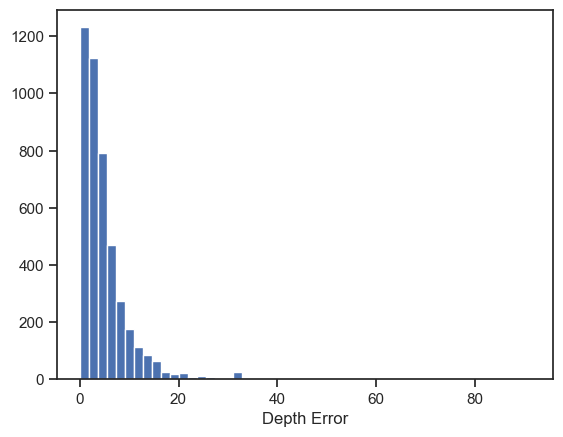

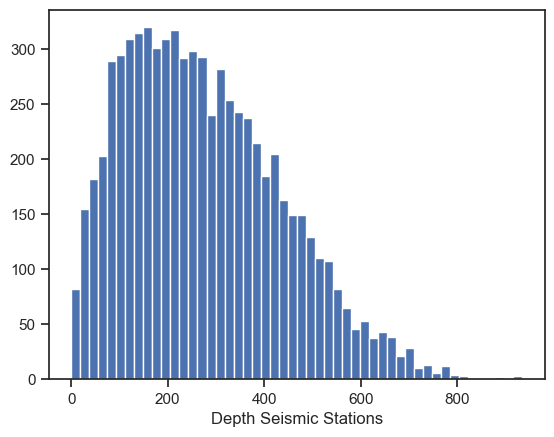

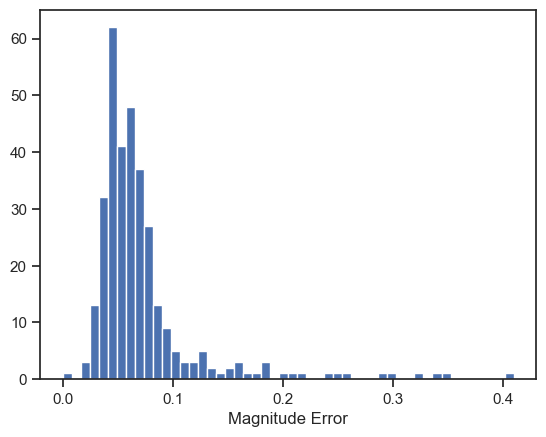

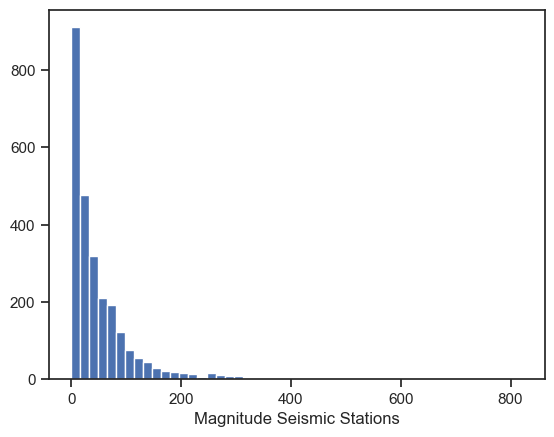

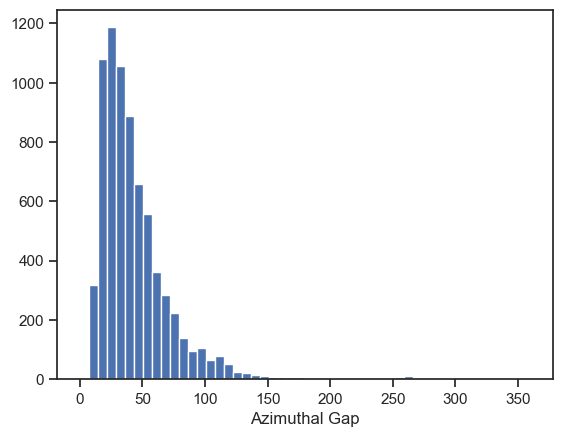

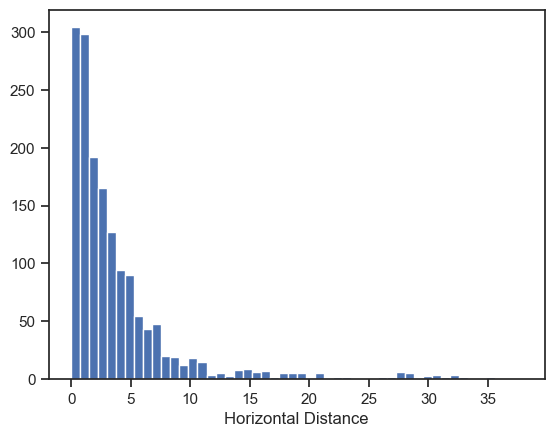

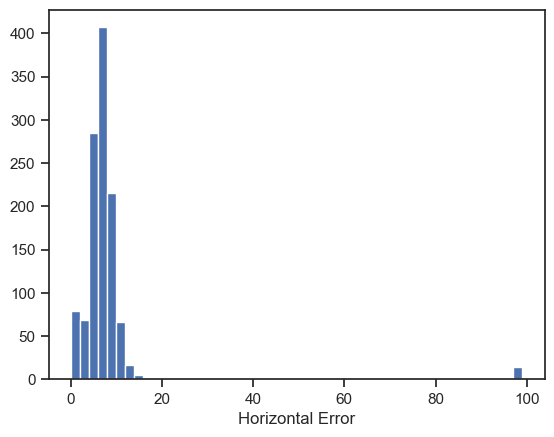

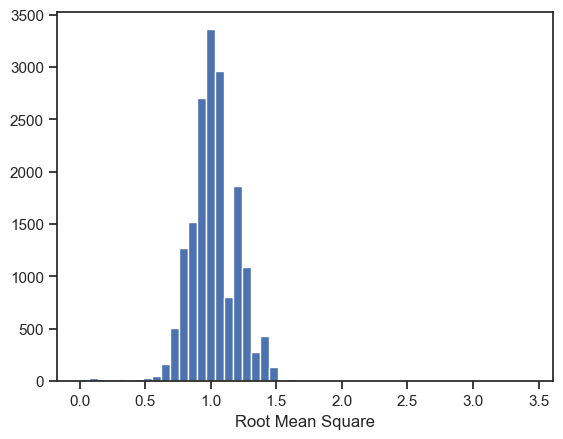

In [37]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импутации библиотеки scikit-learn.

In [38]:
data_num_DepthSeismicStations = data_num[['Depth Seismic Stations']]
data_num_DepthSeismicStations.head()

,Depth Seismic Stations
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [40]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_DepthSeismicStations)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

С помощью класса SimpleImputer можно проводить импутацию различными показателями центра распределения

In [41]:
strategies=['mean', 'median', 'most_frequent']

In [42]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_DepthSeismicStations)
    return data_num_imp[mask_missing_values_only]

In [43]:
for strategy in strategies:
  print(strategy, test_num_impute(strategy))

mean [275.36409751 275.36409751 275.36409751 ... 275.36409751 275.36409751
 275.36409751]
median [255. 255. 255. ... 255. 255. 255.]
most_frequent [0. 0. 0. ... 0. 0. 0.]


In [44]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [46]:
for strategy in strategies:
  print(test_num_impute_col(data, 'Magnitude Seismic Stations', strategy))

('Magnitude Seismic Stations', 'mean', 20848, 48.94461778471139, 48.94461778471139)
('Magnitude Seismic Stations', 'median', 20848, 28.0, 28.0)
('Magnitude Seismic Stations', 'most_frequent', 20848, 1.0, 1.0)


## Обработка пропусков в категориальных данных

In [47]:
# Выберем категориальные колонки с пропущенными значениями
cat_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Magnitude Type. Тип данных object. Количество пустых значений 3, 0.01%.


In [48]:
cat_temp_data = data[['Magnitude Type']]
cat_temp_data.head()

,Magnitude Type
0,MW
1,MW
2,MW
3,MW
4,MW


In [49]:
cat_temp_data['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

In [51]:
# Импутация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
np.unique(data_imp2)

array(['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR', 'MWW'],
      dtype=object)

In [52]:
# Импуютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
np.unique(data_imp3)

array(['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR', 'MWW',
       'NA'], dtype=object)

## Преобразование категориальных признаков в числовые

### С помощью LabelEncoder

In [53]:
cat_enc = pd.DataFrame({'Magnitude Type':data_imp2.T[0]})
cat_enc

,Magnitude Type
0,MW
1,MW
2,MW
3,MW
4,MW
...,...
23407,ML
23408,ML
23409,MWW
23410,MWW


In [54]:
cat_enc['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 'MWB', 'MWW', 'MWR'],
      dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['Magnitude Type'])

In [57]:
cat_enc_le

array([5, 5, 5, ..., 9, 9, 0])

In [58]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
# Обратная кодировка
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array(['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR', 'MWW'],
      dtype=object)

## Масштабирование данных

### MinMax масштабироание

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Depth']])

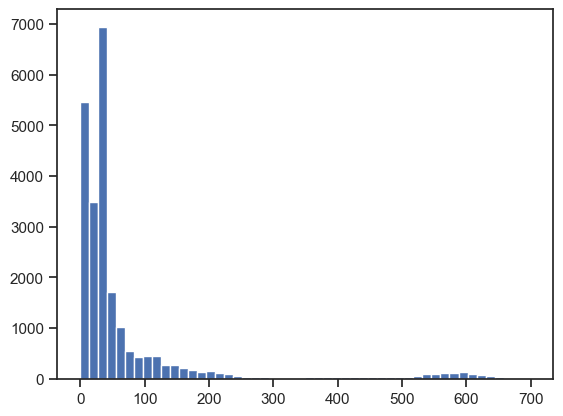

In [62]:
plt.hist(data['Depth'], 50)
plt.show()

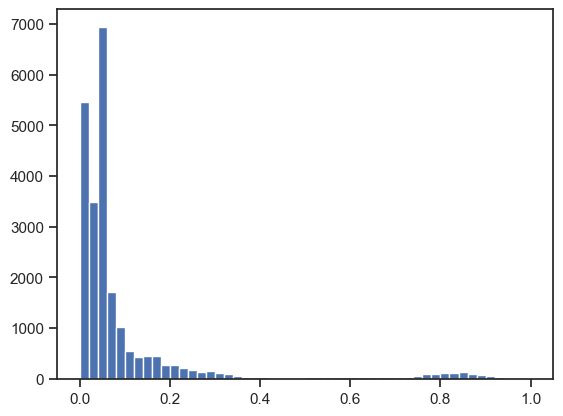

In [63]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Depth']])

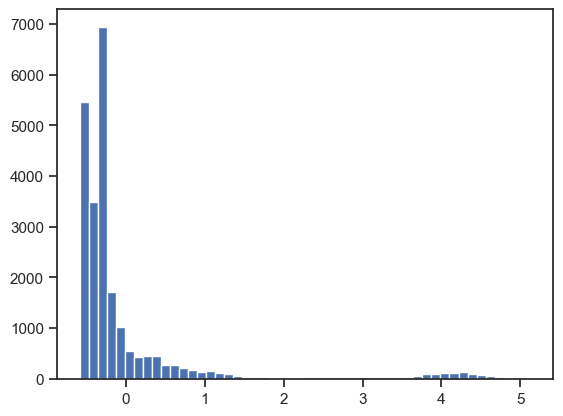

In [66]:
plt.hist(sc2_data, 50)
plt.show()